In [110]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
data = pd.read_csv('stroke_data.csv')

In [246]:
data.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [18]:
data.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
data = data.fillna(0)

In [20]:
data.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [23]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555121,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496958,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [35]:
min_age = data[data['age'] < 0]
min_age.count()

sex                  58
age                  58
hypertension         58
heart_disease        58
ever_married         58
work_type            58
Residence_type       58
avg_glucose_level    58
bmi                  58
smoking_status       58
stroke               58
dtype: int64

In [37]:
data['age'] = data['age'].abs()

In [55]:
data.drop(data[data['age'] == 0].index, inplace = True)
data.shape

(40887, 11)

<Axes: >

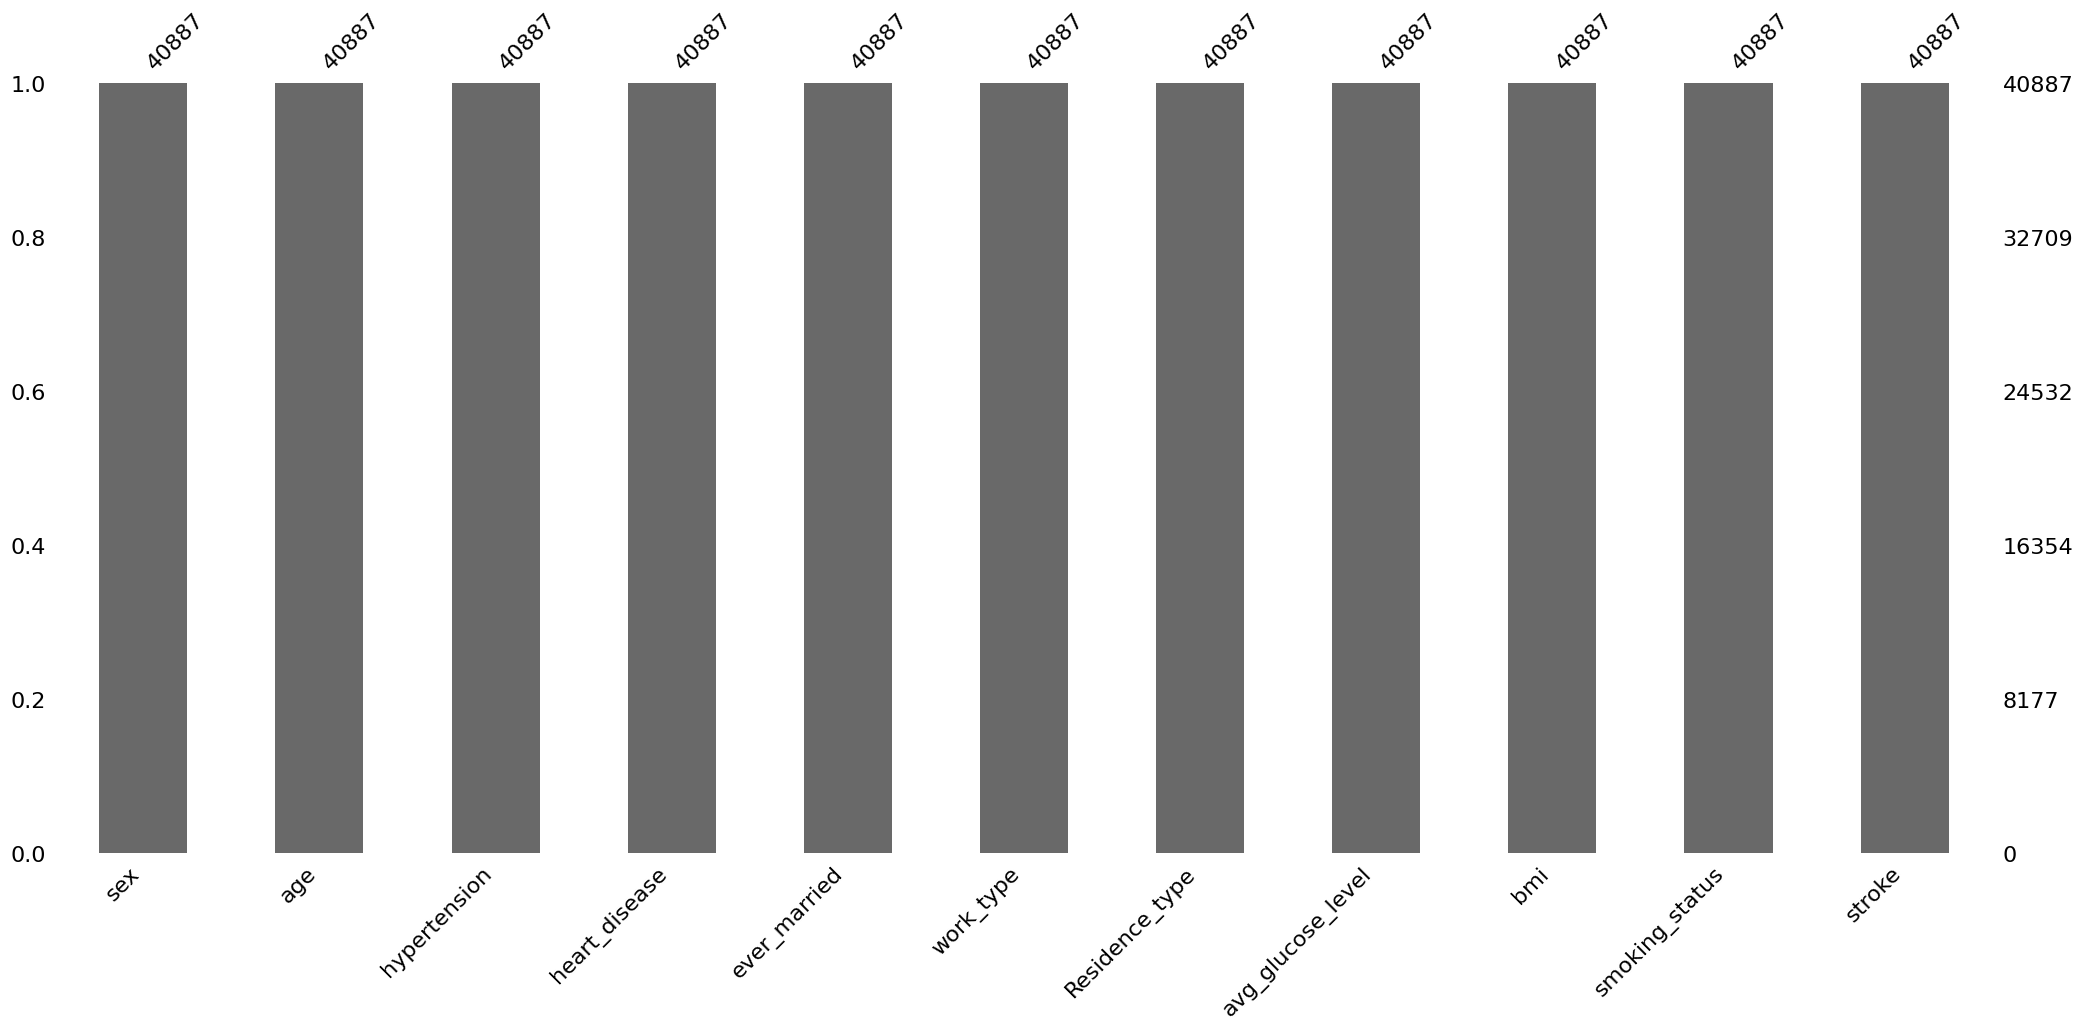

In [57]:
msno.bar(data)

<Axes: xlabel='stroke', ylabel='count'>

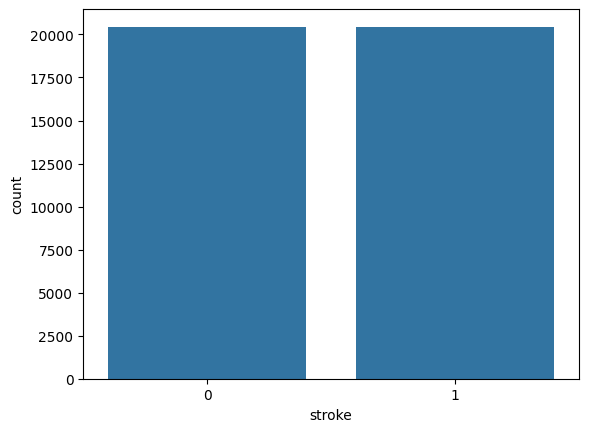

In [61]:
sns.countplot(data = data, x = 'stroke')

In [248]:
percentage = data.loc[:, "stroke"].value_counts(normalize=True) * 100
percentage

stroke
0    50.015897
1    49.984103
Name: proportion, dtype: float64

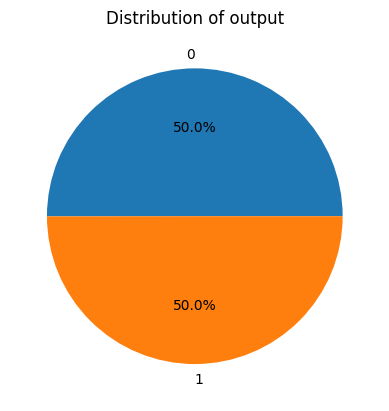

In [63]:
plt.pie(percentage, labels=["0", "1"], autopct = "%1.1f%%")
plt.title("Distribution of output")
plt.show()

In [64]:
X = data.drop(columns = ["stroke"])
y = data['stroke']

In [259]:
row = data[data['stroke'] == 0].index
row

Index([20460, 20461, 20462, 20463, 20464, 20465, 20466, 20467, 20468, 20469,
       ...
       40900, 40901, 40902, 40903, 40904, 40905, 40906, 40907, 40908, 40909],
      dtype='int64', length=20450)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [268]:
X_train.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
10091,0.0,37.0,1,0,1,4,1,221.79,30.0,0
22453,1.0,35.0,0,0,1,2,1,104.36,19.2,1
17240,0.0,82.0,1,1,1,4,1,247.51,40.5,1
11751,1.0,30.0,0,0,1,4,1,105.22,31.0,0
39349,0.0,21.0,0,0,1,4,1,104.37,29.7,0


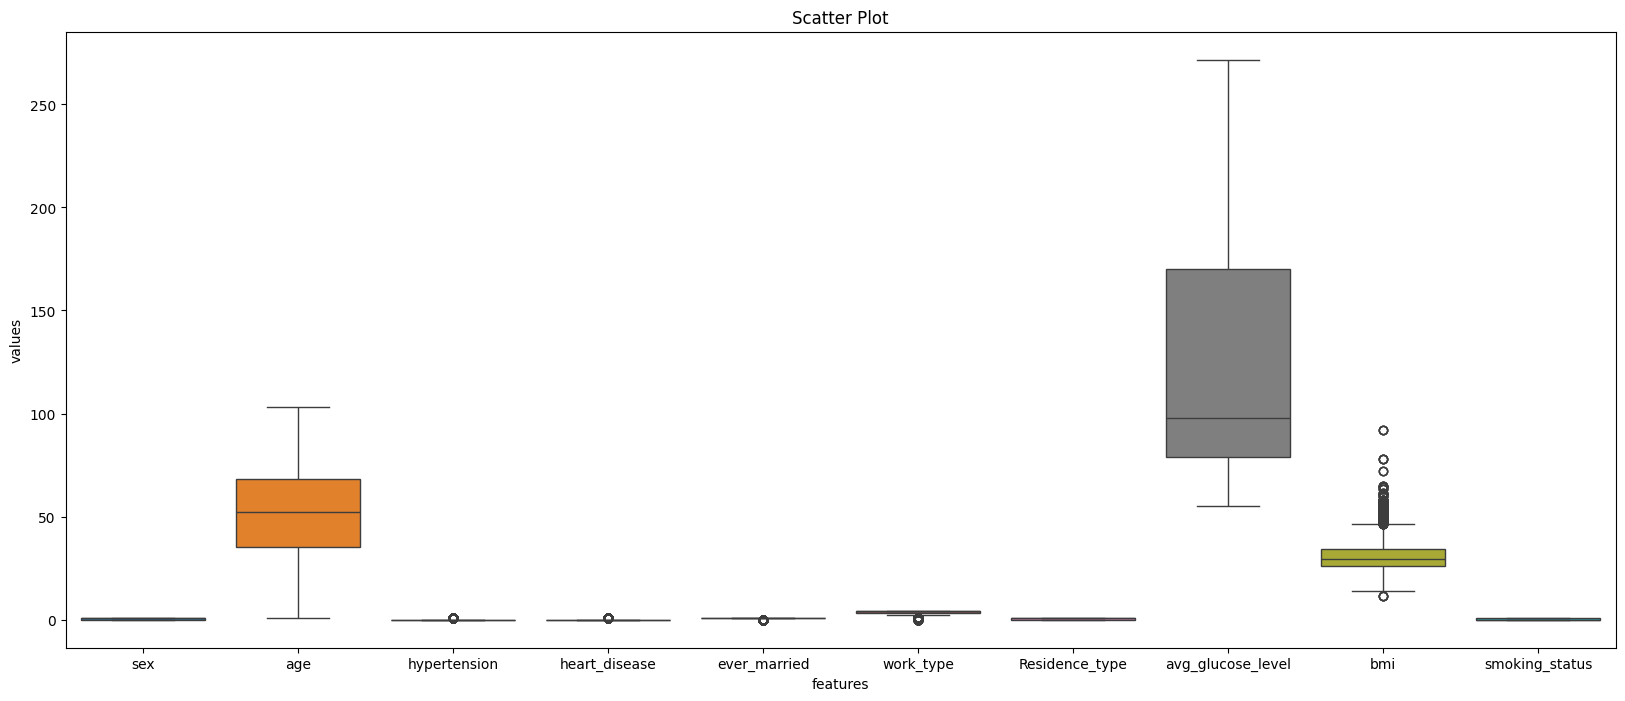

In [204]:
plt.figure(figsize = (20, 8))
sns.boxplot(X_train)

plt.title('Scatter Plot')
plt.xlabel('features')
plt.ylabel('values')
plt.show()

In [205]:
scaler = MinMaxScaler()

In [206]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [207]:
X_train_data = pd.DataFrame(X_train_sc, columns = X.columns)
X_test_data = pd.DataFrame(X_test_sc, columns = X.columns)

X_train_data.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.352941,1.0,0.0,1.0,1.0,1.0,0.769412,0.229814,0.0
1,1.0,0.333333,0.0,0.0,1.0,0.5,1.0,0.227310,0.095652,1.0
2,0.0,0.794118,1.0,1.0,1.0,1.0,1.0,0.888145,0.360248,1.0
3,1.0,0.284314,0.0,0.0,1.0,1.0,1.0,0.231281,0.242236,0.0
4,0.0,0.196078,0.0,0.0,1.0,1.0,1.0,0.227357,0.226087,0.0
5,1.0,0.294118,0.0,0.0,1.0,1.0,1.0,0.161019,0.336646,0.0
6,1.0,0.235294,0.0,0.0,1.0,1.0,1.0,0.102207,0.240994,0.0
7,1.0,0.578431,0.0,0.0,0.0,1.0,1.0,0.067168,0.301863,1.0
8,0.0,0.705882,0.0,0.0,1.0,1.0,1.0,0.238297,0.267081,1.0
9,1.0,0.323529,0.0,0.0,0.0,0.5,1.0,0.134244,0.226087,0.0


In [208]:
X_test_data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.382353,0.0,0.0,0.0,0.75,1.0,0.087573,0.349068,0.0
1,1.0,0.049020,0.0,0.0,1.0,1.00,0.0,0.197581,0.191304,1.0
2,1.0,0.333333,0.0,0.0,1.0,0.50,0.0,0.693519,0.381366,1.0
3,1.0,0.676471,0.0,0.0,1.0,0.75,0.0,0.047733,0.260870,1.0
4,1.0,0.774510,0.0,0.0,1.0,0.75,1.0,0.258656,0.280745,1.0


<h3>Model:</h3>

In [113]:
model = Sequential()

model.add(Dense(64, input_dim=X_train_data.shape[1], activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [114]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [116]:
history = model.fit(X_train_data, y_train, epochs = 100, verbose = 0)

In [123]:
accuracy = history.history['accuracy']
loss = history.history['loss']

In [125]:
accuracy[-1]

0.945492684841156

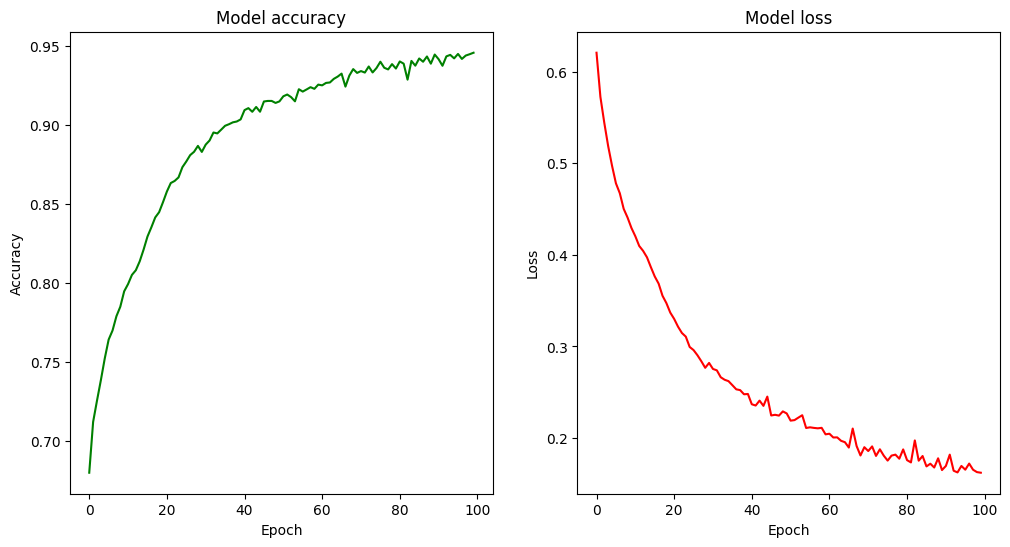

In [133]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=accuracy, ax=axes[0], color='green')
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=loss, ax=axes[1], color='red')
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [135]:
model_128x64x32x16x8 = Sequential()

model_128x64x32x16x8.add(Dense(128, input_dim=X_train_data.shape[1], activation = "relu"))
model_128x64x32x16x8.add(Dense(64, activation = "relu"))
model_128x64x32x16x8.add(Dense(32, activation = "relu"))
model_128x64x32x16x8.add(Dense(16, activation = "relu"))
model_128x64x32x16x8.add(Dense(8, activation = "relu"))
model_128x64x32x16x8.add(Dense(1, activation = "sigmoid"))

In [136]:
model_128x64x32x16x8.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model_128x64x32x16x8.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [138]:
history_1 = model_128x64x32x16x8.fit(X_train_data, y_train, epochs = 100, verbose = 0)

In [139]:
accuracy1 = history_1.history['accuracy']
loss1 = history_1.history['loss']

In [141]:
accuracy1[-1]

0.9762054681777954

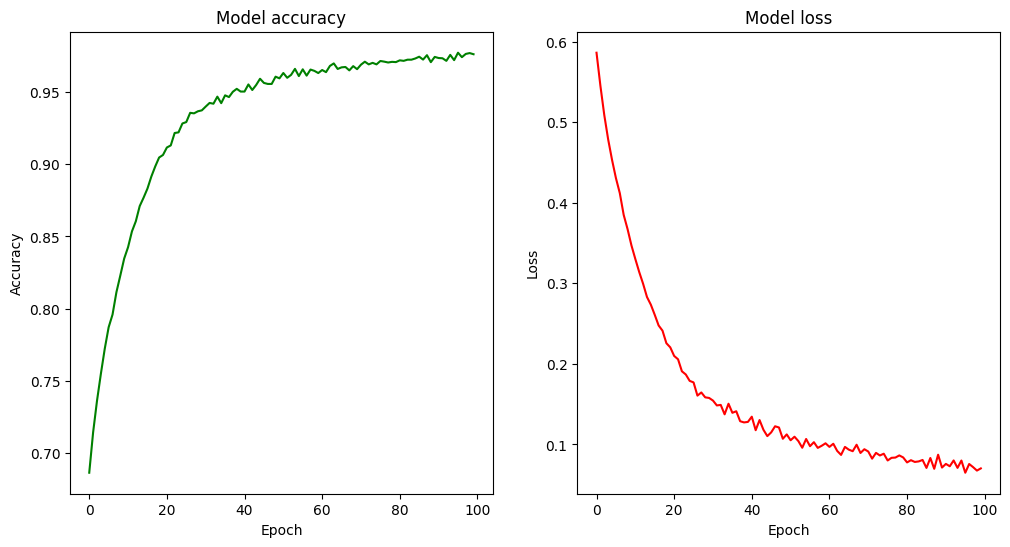

In [142]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=accuracy1, ax=axes[0], color='green')
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=loss1, ax=axes[1], color='red')
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [209]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [217]:
from sklearn.metrics import classification_report


y_pred = model_128x64x32x16x8.predict(X_test_data)

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [218]:
y_pred = [1 if y>=0.5 else 0 for y in y_pred]

In [219]:
test_accuracy = accuracy_score(y_test, y_pred)
precision_ = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)
f1Score_ = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [221]:
print("Accuracy on test set", test_accuracy)
print("Precision Score on test set", precision_)
print("Recall Score on test set", recall_)
print("f1 Score on test set", f1Score_)
print("Classification Report", report)

Accuracy on test set 0.9775006113964294
Precision Score on test set 0.9633201581027668
Recall Score on test set 0.9928303731464885
f1 Score on test set 0.9778526721232547
Classification Report               precision    recall  f1-score   support

           0       0.99      0.96      0.98      6130
           1       0.96      0.99      0.98      6137

    accuracy                           0.98     12267
   macro avg       0.98      0.98      0.98     12267
weighted avg       0.98      0.98      0.98     12267



In [ ]:
# sex	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status
# 1.0	35.0	0	0	1	2	1	104.36	19.2	1

In [269]:
user_input = {
    'sex': 1.0,
    'age': 35.0,
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 1,
    'work_type': 2,
    'Residence_type': 1,
    'avg_glucose_level': 104.36,
    'bmi': 19.2,
    'smoking_status': 1
}

In [270]:
user_df = pd.DataFrame([user_input])

In [271]:
user_df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,35.0,0,0,1,2,1,104.36,19.2,1


In [272]:
user_sc = scaler.transform(user_df)

In [273]:
user_sc

array([[1.        , 0.33333333, 0.        , 0.        , 1.        ,
        0.5       , 1.        , 0.2273105 , 0.09565217, 1.        ]])

In [274]:
prediction_prob = model_128x64x32x16x8.predict(user_sc)
predictions = (prediction_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [275]:
prediction_result = predictions[0][0]
prediction_probability = prediction_prob[0][0]

In [276]:
if prediction_result == 1:
    print(f"The model predicts a positive outcome (stroke) with a probability of {prediction_probability*100:.2f}%.")
else:
    print(f"The model predicts a negative outcome (no stroke) with a probability of {(1-prediction_probability)*100:.2f}%.")

The model predicts a negative outcome (no stroke) with a probability of 100.00%.


In [279]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(model_128x64x32x16x8, f)

In [285]:
app = Flask(__name__)

@app.route('/')
def home():
    return "<h1> Hi, This is ML</h1>"

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1